In [56]:
# !pip install seaborn 

In [200]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

def plot_decision_boundaries(X, y, model_class, **model_params):
    """
    Function to plot the decision boundaries of a classification model.
    This uses just the first two columns of the data for fitting 
    the model as we need to find the predicted value for every point in 
    scatter plot.

    Arguments:
            X: Feature data as a NumPy-type array.
            y: Label data as a NumPy-type array.
            model_class: A Scikit-learn ML estimator class 
            e.g. GaussianNB (imported from sklearn.naive_bayes) or
            LogisticRegression (imported from sklearn.linear_model)
            **model_params: Model parameters to be passed on to the ML estimator
    
    Typical code example:
            plt.figure()
            plt.title("KNN decision boundary with neighbros: 5",fontsize=16)
            plot_decision_boundaries(X_train,y_train,KNeighborsClassifier,n_neighbors=5)
            plt.show()
    """
    try:
        X = np.array(X)
        y = np.array(y).flatten()
    except:
        print("Coercing input data to NumPy arrays failed")
    # Reduces to the first two columns of data
    reduced_data = X[:, :2]
    # Instantiate the model object
    model = model_class(**model_params)
    # Fits the model with the reduced data
    model.fit(reduced_data, y)

    # Step size of the mesh. Decrease to increase the quality of the VQ.
    h = .02     # point in the mesh [x_min, m_max]x[y_min, y_max].    

    # Plot the decision boundary. For that, we will assign a color to each
    x_min, x_max = reduced_data[:, 0].min() - 1, reduced_data[:, 0].max() + 1
    y_min, y_max = reduced_data[:, 1].min() - 1, reduced_data[:, 1].max() + 1
    # Meshgrid creation
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

    # Obtain labels for each point in mesh using the model.
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])    

    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1),
                         np.arange(y_min, y_max, 0.1))

    # Predictions to obtain the classification results
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)

    # Plotting
    plt.contourf(xx, yy, Z, alpha=0.4)
    plt.scatter(X[:, 0], X[:, 1], c=y, alpha=0.8)
    plt.xlabel("Feature-1",fontsize=15)
    plt.ylabel("Feature-2",fontsize=15)
    plt.xticks(fontsize=14)
    plt.yticks(fontsize=14)
    return plt

In [108]:
import seaborn as sns 
import numpy as np 
import pandas as pd 
from sklearn.datasets import make_classification

In [196]:
X,y = make_classification(n_samples=100, 
                          n_features=2,n_informative=2, 
                          n_redundant=0, 
                          n_repeated=0, 
                          n_classes=2,
                          n_clusters_per_class=1,
                         class_sep=2.0,
                         hypercube=False)

In [197]:
data = pd.DataFrame(np.c_[X, y],columns=["col1","col2","class"])

<AxesSubplot:xlabel='col1', ylabel='col2'>

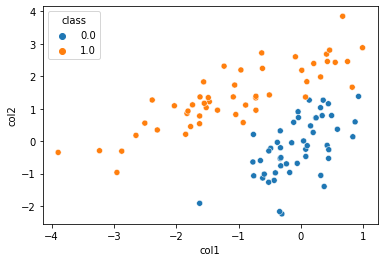

In [198]:
sns.scatterplot(data=data,x="col1",y="col2",hue="class")

In [199]:
from sklearn.naive_bayes import GaussianNB
model = GaussianNB()
model.fit(X,y)

GaussianNB()

<module 'matplotlib.pyplot' from '/home/amit/.conda/envs/eSearch/lib/python3.10/site-packages/matplotlib/pyplot.py'>

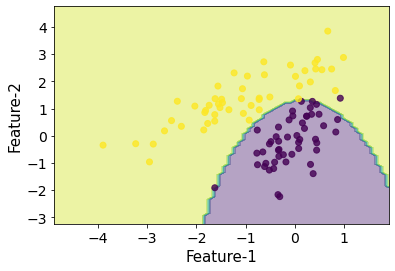

In [203]:
from sklearn.linear_model import LogisticRegression
plot_decision_boundaries(X,y,GaussianNB)

<module 'matplotlib.pyplot' from '/home/amit/.conda/envs/eSearch/lib/python3.10/site-packages/matplotlib/pyplot.py'>

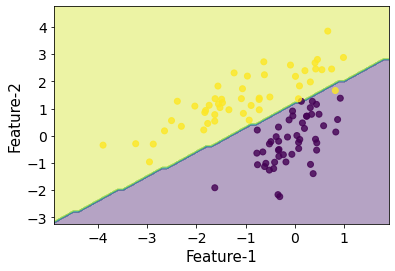

In [204]:
plot_decision_boundaries(X,y,LogisticRegression)

In [205]:
from sklearn.neighbors import KNeighborsClassifier 

<module 'matplotlib.pyplot' from '/home/amit/.conda/envs/eSearch/lib/python3.10/site-packages/matplotlib/pyplot.py'>

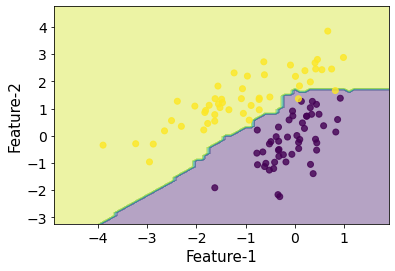

In [212]:
plot_decision_boundaries(X,y,KNeighborsClassifier,n_neighbors=10)